<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/fuzzy_search_fastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

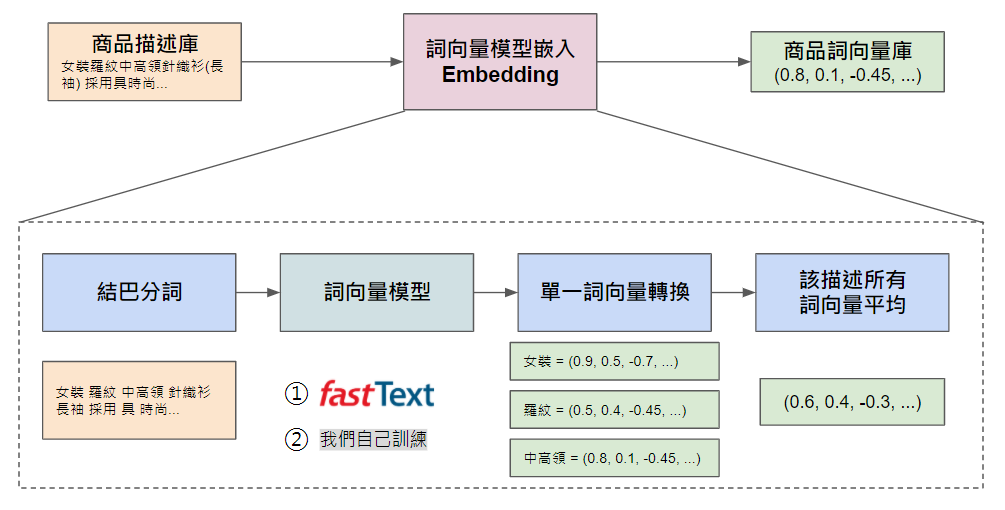

In [64]:
import pandas as pd

product_data = pd.read_csv('product_node.csv')
product_data

,sn,name,image_url,description
0,MU01,雙面可穿鋪棉連帽大衣,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,男裝雙面可穿鋪棉連帽大衣NT 軍綠
1,MU02,雙面可穿鋪棉連帽大衣,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,男裝雙面可穿鋪棉連帽大衣NT 米白
2,MU03,棒球外套,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,男裝棒球外套STUDIO SEVEN 灰色
3,MU04,棒球外套,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,男裝棒球外套STUDIO SEVEN 黑色
4,MU05,寬版鋪綿牛仔外套,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,男裝寬版鋪綿牛仔外套
...,...,...,...,...
97,FU14,多層次穿搭針織衫,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,女裝多層次穿搭針織衫(附背心兩件組)(長袖) 看起來像層搭圓弧衣襬襯衫的假兩件針織衫。在好搭...
98,FU15,羅紋中高領針織衫,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,女裝羅紋中高領針織衫(長袖) 採用具時尚感的中高領設計，展現俐落感的羅紋針織衫。使用不易起毛...
99,FU16,羅紋中高領針織衫,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,女裝羅紋中高領針織衫(長袖) 採用具時尚感的中高領設計，展現俐落感的羅紋針織衫。使用不易起毛...
100,FU17,Soft RichV領針織長上衣,https://im.uniqlo.com/images/tw/gu/pc/goods/32...,女裝Soft RichV領針織長上衣(長袖) 可露出美麗肩頸的V領針織長上衣。特色是蓬鬆柔軟...


In [1]:
"""Load fastText"""
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.bin.gz
!gunzip cc.zh.300.bin.gz
from gensim.models.fasttext import FastText
import warnings

ft_model = FastText.load_fasttext_format('cc.zh.300.bin')
warnings.filterwarnings('ignore', category=FutureWarning)

--2020-11-07 10:31:44--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4478681770 (4.2G) [application/octet-stream]
Saving to: ‘cc.zh.300.bin.gz’

cc.zh.300.bin.gz    100%[===================>]   4.17G  42.3MB/s    in 1m 43s  

2020-11-07 10:33:28 (41.3 MB/s) - ‘cc.zh.300.bin.gz’ saved [4478681770/4478681770]



In [15]:
vec_dim = len(ft_model.wv['穿搭'])
vec_dim

300

In [9]:
from urllib.request import urlretrieve
import jieba
import os

# load big dictionary
big_dict_path = 'dict.txt.big'
if not os.path.exists(big_dict_path):
    print('loading the big dictionary')
    url = 'https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big'
    urlretrieve(url, big_dict_path)
jieba.set_dictionary(big_dict_path)
print('Done.')

loading the big dictionary
Done.


In [13]:
"""Text segmentation via jieba"""
import re
# clean useless characters & cut by jieba
punct = set(u''':!),.:;?]}¢'"、。〉》」』】〕〗〞︰︱︳﹐､﹒﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠々‖•·ˇˉ―--′’”([{£¥'"‵〈《「『【〔〖（［｛￡￥〝︵︷︹︻︽︿﹁﹃﹙﹛﹝（｛“‘-—_…~/ －＊➜■─★☆=@<>◉é''')

def process(content):
    content = re.sub(r'https?:\/\/.*[\r\n]*', '', content)
    fil = filter(lambda x: x not in punct, jieba.cut(content))
    content = ' '.join(fil)
    return content

desc_cut = product_data['description'].apply(process)
desc_cut.to_csv('desc_cut.csv', encoding='utf-8', index=False)
desc_cut

Building prefix dict from /content/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
Loading model cost 1.607 seconds.
Prefix dict has been built successfully.


0                                男裝 雙面 可穿 鋪 棉連帽 大衣 NT 軍綠
1                                男裝 雙面 可穿 鋪 棉連帽 大衣 NT 米白
2                               男裝 棒球 外套 STUDIO SEVEN 灰色
3                               男裝 棒球 外套 STUDIO SEVEN 黑色
4                                         男裝 寬版 鋪綿 牛仔 外套
                             ...                        
97     女裝 多層次 穿 搭 針織衫 附 背心 兩件 組 長袖 看起來 像 層 搭 圓弧 衣襬 襯衫...
98     女裝 羅紋 中 高領 針織衫 長袖 採用 具 時尚 感 的 中 高領 設計 展現 俐落 感 ...
99     女裝 羅紋 中 高領 針織衫 長袖 採用 具 時尚 感 的 中 高領 設計 展現 俐落 感 ...
100    女裝 Soft RichV 領 針織 長上 衣 長袖 可 露出 美麗 肩頸 的 V 領 針織...
101    女裝 Soft RichV 領 針織 長上 衣 長袖 可 露出 美麗 肩頸 的 V 領 針織...
Name: description, Length: 102, dtype: object

In [20]:
"""Transfer product description to vector"""
import numpy as np
def des2vec(description):
  word_list = list(jieba.cut(description))
  vec = np.zeros(vec_dim)
  for w in word_list:
    if w in ft_model.wv:
      vec += ft_model.wv[w]
  return vec / len(word_list)
  
des_vec = product_data['description'].apply(des2vec)
des_vec

0      [0.00894315168261528, 0.03962246080239614, 0.2...
1      [0.023616826782623928, 0.027997362116972607, 0...
2      [0.052509403684073024, 0.03667074400517675, 0....
3      [0.052459183847531676, 0.05575024662539363, 0....
4      [-0.00716402567923069, 0.05476701632142067, 0....
                             ...                        
97     [0.027758992035631782, 7.321254815906286e-05, ...
98     [0.00860073241989973, 0.032999087861457534, 0....
99     [0.006043378155418607, 0.029518946268877317, 0...
100    [-0.010122116664550393, -0.013029784656356316,...
101    [-0.009407100956761153, -0.014596882993607101,...
Name: description, Length: 102, dtype: object

In [26]:
# save as word2vec format
f = open('des_vec.txt' ,'w')
f.write('{} {}\n'.format(len(des_vec), vec_dim))
for i, v in enumerate(des_vec):
    s = ' '.join(map(str, list(v)))
    f.write('{} {}\n'.format(i, s))
f.close()

In [63]:
# load product vector
from gensim.models import KeyedVectors

product_vec = KeyedVectors.load_word2vec_format('des_vec.txt', binary=False)
print(len(product_vec.wv.vocab), len(product_vec.wv['0']))

102 300


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [28]:
query_keyword = ['長袖', '毛衣', '綠色', '女性']

q_vec = np.zeros(vec_dim)
for w in query_keyword:
  if w in ft_model.wv:
    q_vec += ft_model.wv[w]
q_vec = q_vec / len(query_keyword)
len(q_vec)

300

In [39]:
# compare similar by vector
top6 = product_vec.similar_by_vector(q_vec, topn=6)
top6

[('21', 0.7956585884094238),
 ('19', 0.7931942939758301),
 ('17', 0.7931896448135376),
 ('18', 0.7896075248718262),
 ('89', 0.7736848592758179),
 ('88', 0.771405041217804)]

In [54]:
# print product info
for i in range(len(top6)):
  print(i, product_data['sn'][int(top6[i][0])], product_data['name'][int(top6[i][0])])

0 MU22 寬版休閒上衣
1 MU20 北歐圖騰圓領針織衫
2 MU18 經典款圓領針織衫
3 MU19 經典款圓領針織衫
4 FU06 泡芙袖針織POLO衫
5 FU05 泡芙袖針織POLO衫


In [55]:
print('推薦商品:', product_data['sn'][int(top6[0][0])], product_data['name'][int(top6[0][0])])
print('推薦指數:', top6[0][1])

推薦商品: MU22 寬版休閒上衣
推薦指數: 0.7956585884094238


In [58]:
def key2vec(keyword):
  q_vec = np.zeros(vec_dim)
  for w in keyword:
    if w in ft_model.wv:
      q_vec += ft_model.wv[w]
  return q_vec / len(keyword)

In [74]:
"""Demo"""
query_keyword = ['T-shirt', '長袖', '藍色', '男生']

k_vec = key2vec(query_keyword)

match = product_vec.similar_by_vector(k_vec, topn=1)

print('推薦商品:', product_data['sn'][int(match[0][0])], product_data['name'][int(match[0][0])])
print('推薦商品:', product_data['description'][int(match[0][0])])
print('推薦指數:', match[0][1])

推薦商品: MU20 北歐圖騰圓領針織衫
推薦商品: 男裝北歐圖騰圓領針織衫(長袖) 圖騰 黑色
推薦指數: 0.8066866993904114


In [75]:
# show why fastText is not good at closths outfiting
ft_model.wv.most_similar('男裝')

[('女裝', 0.7379858493804932),
 ('裝都', 0.5827866196632385),
 ('服裝', 0.5794341564178467),
 ('服飾', 0.5741493105888367),
 ('時裝', 0.5729079246520996),
 ('童裝', 0.5615533590316772),
 ('風衣', 0.5613547563552856),
 ('褲款', 0.5550315380096436),
 ('裙裝', 0.5535938739776611),
 ('褲裝', 0.5535701513290405)]